In [3]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data/icml_face_data.csv')

# Separate the data based on the 'Usage' column
train_data = data[data[' Usage'] == 'Training']
public_test_data = data[data[' Usage'] == 'PublicTest']
private_test_data = data[data[' Usage'] == 'PrivateTest']

# Combine public test and private test data into a single test set
test_data = pd.concat([public_test_data, private_test_data], ignore_index=True)

# Separate the features and labels
X_train_raw = train_data[' pixels'].values
y_train = train_data['emotion'].values
X_test_raw = test_data[' pixels'].values
y_test = test_data['emotion'].values

# Function to convert pixel strings into NumPy arrays
def convert_pixels_to_array(pixels, image_size=48):
    array = np.zeros((pixels.shape[0], image_size, image_size, 1))
    for i, pixel_sequence in enumerate(pixels):
        pixels_array = np.array(pixel_sequence.split(), dtype='float32')
        pixels_array = pixels_array.reshape(image_size, image_size, 1)
        array[i] = pixels_array
    return array

# Convert pixel strings to NumPy arrays and normalize the pixel values
X_train = convert_pixels_to_array(X_train_raw) / 255.0
X_test = convert_pixels_to_array(X_test_raw) / 255.0


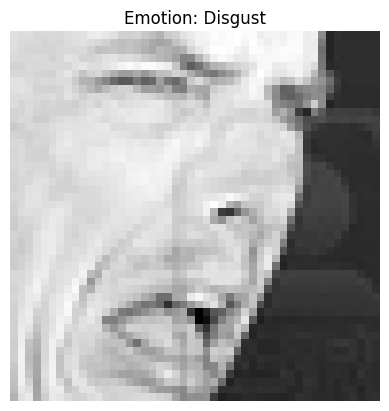

In [4]:
import matplotlib.pyplot as plt
import random

# Create a dictionary to map the numeric emotion code to its corresponding text label
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

def display_random_image(X, y):
    # Select a random index
    random_index = random.randint(0, len(X) - 1)
    
    # Get the corresponding image and label
    img = X[random_index]
    label = y[random_index]
    
    # Map the numeric label to its text label
    text_label = emotion_labels[label]
    
    # Display the image using matplotlib
    plt.imshow(img.reshape(48, 48), cmap='gray')
    plt.title(f'Emotion: {text_label}')
    plt.axis('off')
    plt.show()

# Display a random image from the dataset
display_random_image(X_train, y_train)


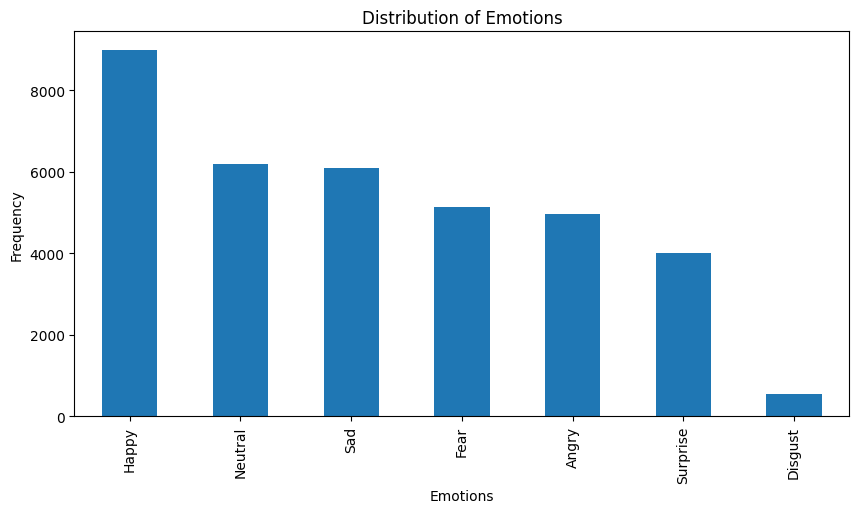

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with the column 'emotion'
emotion_counts = data['emotion'].value_counts()
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Replace numeric labels with text labels
emotion_counts.index = [emotion_labels[label] for label in emotion_counts.index]

# Create a bar plot of the emotion counts
plt.figure(figsize=(10, 5))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(num_filters=[32, 64], filter_size=(3, 3), pool_size=(2, 2), dense_units=128, dropout_rate=0.5):
    model = Sequential()
    
    # First convolutional and pooling layers
    model.add(Conv2D(num_filters[0], filter_size, activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=pool_size))

    # Second convolutional and pooling layers
    model.add(Conv2D(num_filters[1], filter_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(7, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Reshape the data to be in the format required by the CNN
X_train_cnn = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 48, 48, 1)

# Wrap the model function with KerasClassifier
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=64, verbose=0)

# Define the parameter grid
param_grid = {
    'num_filters': [[32, 64], [64, 128]],
    'filter_size': [(3, 3), (5, 5)],
    'dense_units': [128, 256],
    'dropout_rate': [0.25, 0.5]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=3)

# Fit the grid search object to the training data
grid_result = grid.fit(X_train_cnn, y_train)


C:\Users\Jonat\AppData\Local\Temp\ipykernel_5400\2920602466.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=64, verbose=0)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END dense_units=128, dropout_rate=0.25, filter_size=(3, 3), num_filters=[32, 64];, score=0.515 total time=  18.9s
[CV 2/3] END dense_units=128, dropout_rate=0.25, filter_size=(3, 3), num_filters=[32, 64];, score=0.509 total time=  19.8s
[CV 3/3] END dense_units=128, dropout_rate=0.25, filter_size=(3, 3), num_filters=[32, 64];, score=0.521 total time=  23.1s
[CV 1/3] END dense_units=128, dropout_rate=0.25, filter_size=(3, 3), num_filters=[64, 128];, score=0.503 total time=  25.3s
[CV 2/3] END dense_units=128, dropout_rate=0.25, filter_size=(3, 3), num_filters=[64, 128];, score=0.505 total time=  25.7s
[CV 3/3] END dense_units=128, dropout_rate=0.25, filter_size=(3, 3), num_filters=[64, 128];, score=0.532 total time=  26.1s
[CV 1/3] END dense_units=128, dropout_rate=0.25, filter_size=(5, 5), num_filters=[32, 64];, score=0.516 total time=  19.9s
[CV 2/3] END dense_units=128, dropout_rate=0.25, filter_size=(5, 5), num_fi

In [ ]:
# Get the best parameters and score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'dense_units': 256, 'dropout_rate': 0.5, 'filter_size': (3, 3), 'num_filters': [32, 64]}
Best score: 0.5249575773874918


In [ ]:
# Evaluate the best model on the test data
best_model = grid_result.best_estimator_.model
test_loss, test_acc = best_model.evaluate(X_test_cnn, y_test, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 1.2239562273025513
Test accuracy: 0.5412371158599854


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build and compile the best model with the best parameters
best_model = build_model(
    num_filters=best_params['num_filters'],
    filter_size=best_params['filter_size'],
    dense_units=best_params['dense_units'],
    dropout_rate=best_params['dropout_rate']
)

# Train the best model with early stopping
history = best_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Evaluate the best model on the test data
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Epoch 1/500
449/449 [==============================] - 4s 9ms/step - loss: 1.6483 - accuracy: 0.3501 - val_loss: 1.4676 - val_accuracy: 0.4365
Epoch 2/500
449/449 [==============================] - 4s 8ms/step - loss: 1.4420 - accuracy: 0.4453 - val_loss: 1.3549 - val_accuracy: 0.4826
Epoch 3/500
449/449 [==============================] - 4s 8ms/step - loss: 1.3462 - accuracy: 0.4877 - val_loss: 1.3027 - val_accuracy: 0.4964
Epoch 4/500
449/449 [==============================] - 4s 8ms/step - loss: 1.2750 - accuracy: 0.5143 - val_loss: 1.2786 - val_accuracy: 0.5109
Epoch 5/500
449/449 [==============================] - 4s 8ms/step - loss: 1.2269 - accuracy: 0.5353 - val_loss: 1.2527 - val_accuracy: 0.5201
Epoch 6/500
449/449 [==============================] - 4s 8ms/step - loss: 1.1695 - accuracy: 0.5544 - val_loss: 1.2257 - val_accuracy: 0.5293
Epoch 7/500
449/449 [==============================] - 4s 8ms/step - loss: 1.1115 - accuracy: 0.5809 - val_loss: 1.2453 - val_accuracy: 0.5262

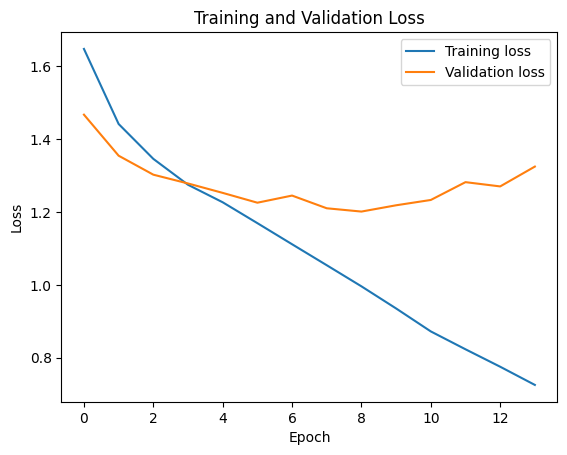

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


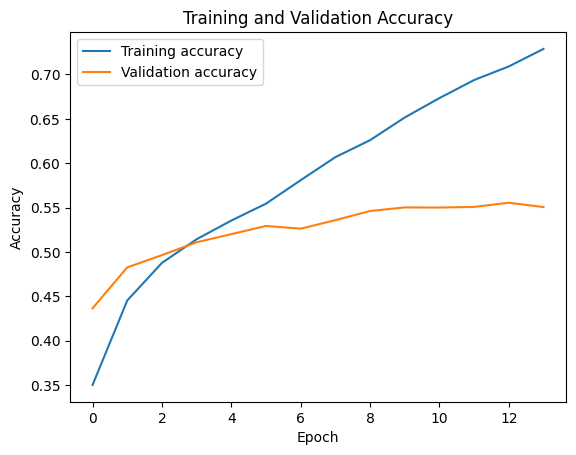

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import BatchNormalization

def build_model_v2(num_filters, filter_size, dense_units, dropout_rate):
    model = Sequential()

    # First convolutional layer with batch normalization
    model.add(Conv2D(num_filters, filter_size, activation='relu', padding='same', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())

    # Second convolutional layer with batch normalization
    model.add(Conv2D(num_filters, filter_size, activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Max pooling and dropout layers
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Third convolutional layer with batch normalization
    model.add(Conv2D(2*num_filters, filter_size, activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fourth convolutional layer with batch normalization
    model.add(Conv2D(2*num_filters, filter_size, activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Max pooling and dropout layers
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Fifth convolutional layer with batch normalization
    model.add(Conv2D(4*num_filters, filter_size, activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Sixth convolutional layer with batch normalization
    model.add(Conv2D(4*num_filters, filter_size, activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Max pooling and dropout layers
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten layer to convert the 3D feature maps to 1D feature vectors
    model.add(Flatten())

    # Fully connected dense layer with batch normalization
    model.add(Dense(dense_units, activation='relu'))
    model.add(BatchNormalization())

    # Dropout layer
    model.add(Dropout(dropout_rate))

    # Output layer with softmax activation for multi-class classification
    model.add(Dense(7, activation='softmax'))

    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



In [11]:



# Wrap the v2 model function with KerasClassifier
model_v2 = KerasClassifier(build_fn=build_model_v2, verbose=3)

param_grid_v2 = {
    'num_filters': [32, 64, 128],
    'filter_size': [3, 5],
    'dense_units': [128, 256, 512],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [10],
}


# Run the RandomizedSearchCV with the new model
random_search_v2 = RandomizedSearchCV(
    estimator=model_v2,
    param_distributions=param_grid_v2,
    n_iter=20,
    cv=3,
    verbose=3,
    n_jobs=1,
    random_state=42
)

# Fit the new model
random_search_v2.fit(X_train, y_train, validation_data=(X_test, y_test))

# Print the best parameters
print("Best parameters found:", random_search_v2.best_params_)


C:\Users\Jonat\AppData\Local\Temp\ipykernel_10836\3721815569.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_v2 = KerasClassifier(build_fn=build_model_v2, verbose=3)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 1/3] END batch_size=128, dense_units=512, dropout_rate=0.3, epochs=10, filter_size=5, num_filters=32;, score=0.512 total time= 1.1min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 2/3] END batch_size=128, dense_units=512, dropout_rate=0.3, epochs=10, filter_size=5, num_filters=32;, score=0.552 total time=  57.6s
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 3/3] END batch_size=128, dense_units=512, dropout_rate=0.3, epochs=10, filter_size=5, num_filters=32;, score=0.579 total time= 1.0min
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV 1/3] END batch_size=128, dense_units=512, dropout_rate=0.5, epochs=10, filter

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build and compile the best model with the best parameters
best_model_v2 = build_model_v2(
    num_filters=random_search_v2.best_params_['num_filters'],
    filter_size=random_search_v2.best_params_['filter_size'],
    dense_units=random_search_v2.best_params_['dense_units'],
    dropout_rate=random_search_v2.best_params_['dropout_rate']
)

# Train the best model with early stopping
history_v2 = best_model_v2.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Evaluate the best model on the test data
test_loss_v2, test_acc_v2 = best_model_v2.evaluate(X_test, y_test, verbose=0)

print("Test loss (v2):", test_loss_v2)
print("Test accuracy (v2):", test_acc_v2)


Epoch 1/500
898/898 [==============================] - 22s 22ms/step - loss: 1.7911 - accuracy: 0.3292 - val_loss: 1.5001 - val_accuracy: 0.4182
Epoch 2/500
898/898 [==============================] - 18s 20ms/step - loss: 1.3671 - accuracy: 0.4747 - val_loss: 1.3093 - val_accuracy: 0.5006
Epoch 3/500
898/898 [==============================] - 19s 21ms/step - loss: 1.2297 - accuracy: 0.5299 - val_loss: 1.2099 - val_accuracy: 0.5474
Epoch 4/500
898/898 [==============================] - 20s 22ms/step - loss: 1.1615 - accuracy: 0.5639 - val_loss: 1.1878 - val_accuracy: 0.5658
Epoch 5/500
898/898 [==============================] - 19s 21ms/step - loss: 1.0911 - accuracy: 0.5893 - val_loss: 1.0720 - val_accuracy: 0.5924
Epoch 6/500
898/898 [==============================] - 19s 21ms/step - loss: 1.0385 - accuracy: 0.6130 - val_loss: 1.0759 - val_accuracy: 0.6027
Epoch 7/500
898/898 [==============================] - 19s 22ms/step - loss: 0.9823 - accuracy: 0.6359 - val_loss: 1.0593 - val_ac

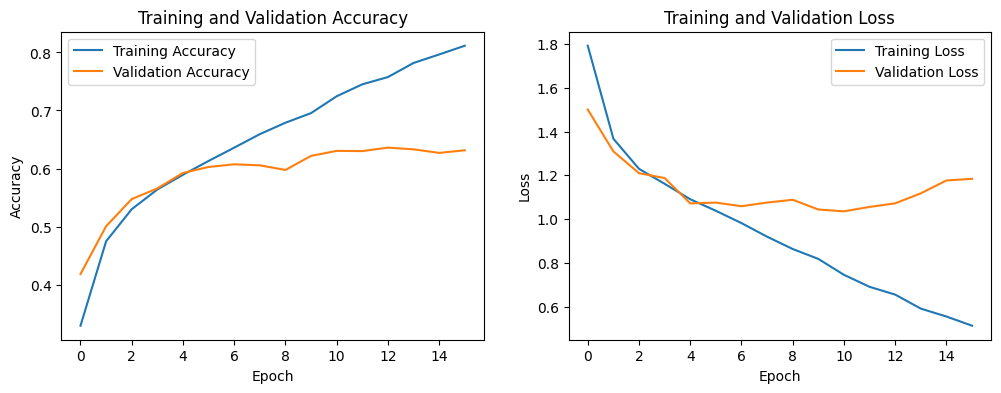

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'], label='Training Accuracy')
plt.plot(history_v2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'], label='Training Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
